In [22]:
import matplotlib
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import sys
import pandas as pd
from IPython.display import display
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

/Library/Python/3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


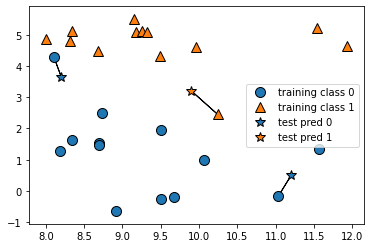

In [23]:
# k-Neighbors classification
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Library/Python/3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


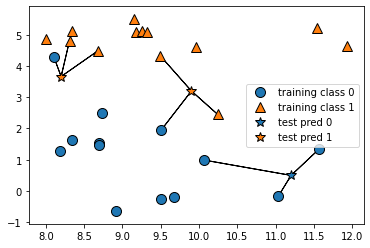

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [25]:
# разделение даных на обучающий и тестовый
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Library/Python/3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [26]:
# количество сосоедей
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [27]:
# подгоняем классификатор используя обучающий набор + прогнооз + оценка
clf.fit(X_train, y_train)
print("Прогноз тестового:", clf.predict(X_test))
print("Тестовый accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Прогноз тестового: [1 0 1 0 1 0 0]
Тестовый accuracy: 0.86


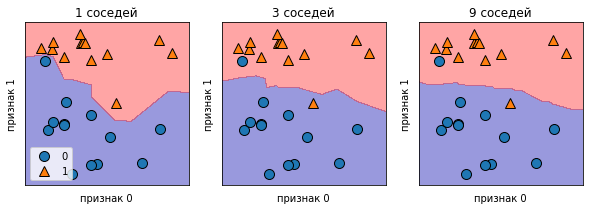

In [28]:
# Analyzing KNeighborsClassifier - визуализация границ принятия решений
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # создание объекта классификатора и подгон в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} соседей".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")
axes[0].legend(loc=3)

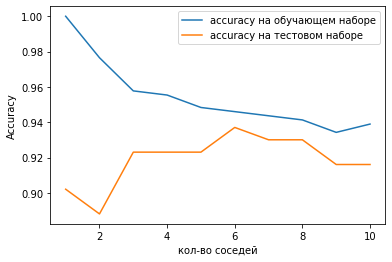

In [29]:
from sklearn.datasets import load_breast_cancer
# разбиение на обуч/тест
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# соседи от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    # правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="accuracy на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="accuracy на тестовом наборе")
plt.ylabel("Accuracy")
plt.xlabel("кол-во соседей")
plt.legend()

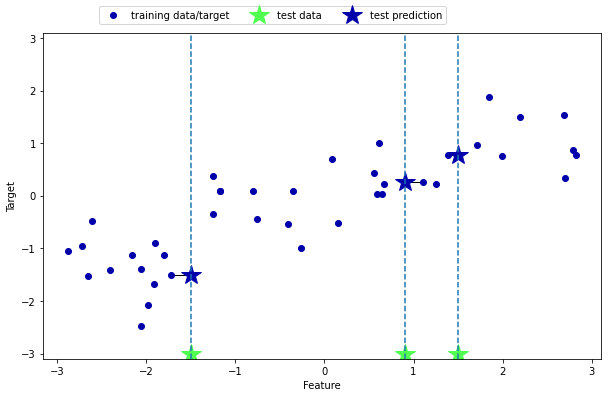

In [30]:
# k-neighbors regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

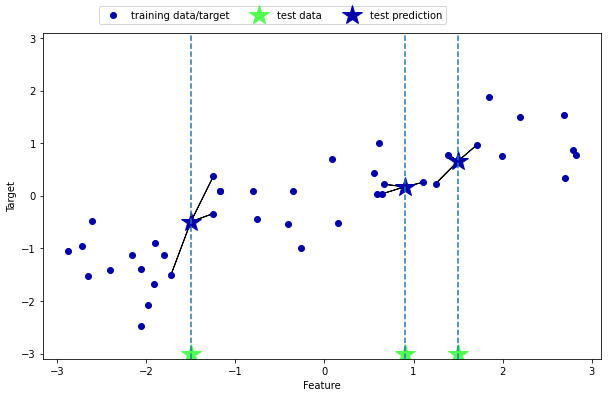

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# разбивка на обуч/тест
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# создание экземпляра можели и ставим кол-во соседей 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгон модели с помощью обучающих данных/ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
print("Прогноз тестового:\n", reg.predict(X_test))
print("Тестовая R^2: {:.2f}".format(reg.score(X_test, y_test)))

Прогноз тестового:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Тестовая R^2: 0.83


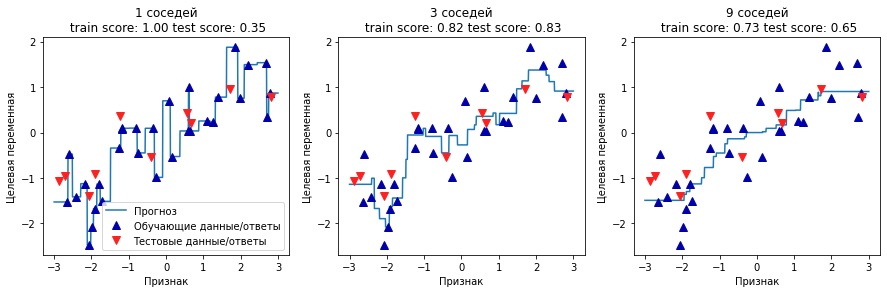

In [34]:
# Analyzing KNeighborsRegressor - прогнозы для всех значений признаков
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создание 1000 точек данных распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получение прогнозов 1/3/9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} соседей\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогноз", "Обучающие данные/ответы",
                "Тестовые данные/ответы"], loc="best")

w[0]: 0.393906  b: -0.031804


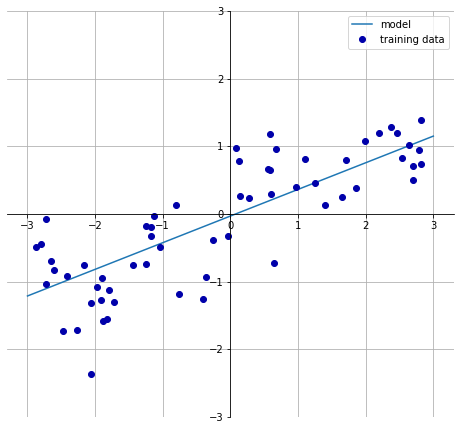

In [35]:
# Linear Models
mglearn.plots.plot_linear_regression_wave()

In [36]:
# Linear regression aka ordinary least squares - обычный метод наименьших квадратов
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:", lr.coef_) # параметры наклона w
print("lr.intercept_:", lr.intercept_) # сдвиг offset и констнатнта intercept b

print("Обучающий: {:.2f}".format(lr.score(X_train, y_train)))
print("Тестовый: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Обучающий: 0.67
Тестовый: 0.66


In [37]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/Library/Python/3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :

In [38]:
print("Обучающая: {:.2f}".format(lr.score(X_train, y_train)))
print("Тестовая: {:.2f}".format(lr.score(X_test, y_test)))

Обучающая: 0.95
Тестовая: 0.61


In [39]:
# Ridge regression гребневая регрессия
from sklearn.linear_model import Ridge
# alpha = 1 по умолчанию
ridge = Ridge().fit(X_train, y_train)
print("Обучающая: {:.2f}".format(ridge.score(X_train, y_train)))
print("Тестовая: {:.2f}".format(ridge.score(X_test, y_test)))

Обучающая: 0.89
Тестовая: 0.75


In [40]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Обучающая: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Тестовая: {:.2f}".format(ridge10.score(X_test, y_test)))

Обучающая: 0.79
Тестовая: 0.64


In [41]:
# alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Обучающая: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Тестовая: {:.2f}".format(ridge01.score(X_test, y_test)))

Обучающая: 0.93
Тестовая: 0.77


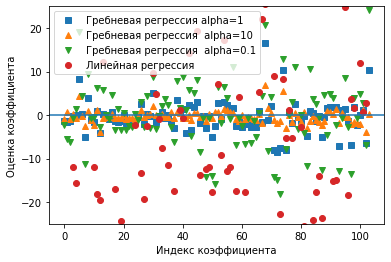

In [42]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия  alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия  alpha=0.1")

plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

/Library/Python/3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :

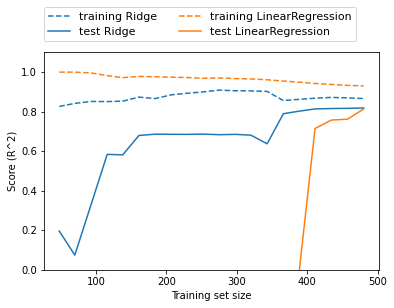

In [43]:
mglearn.plots.plot_ridge_n_samples()

In [44]:
# Lasso Лассо
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Обучающая: {:.2f}".format(lasso.score(X_train, y_train)))
print("Тестовая: {:.2f}".format(lasso.score(X_test, y_test)))
print("Кол-во признаков:", np.sum(lasso.coef_ != 0))

Обучающая: 0.29
Тестовая: 0.21
Кол-во признаков: 4


In [45]:
# увеличение значение max_iter иначе будет ошибка alpha = 0.01
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Обучающая: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Тестовая: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Кол-во признаков:", np.sum(lasso001.coef_ != 0))

Обучающая: 0.90
Тестовая: 0.77
Кол-во признаков: 33


In [46]:
# alpha = 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Обучающая: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Тестовая: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Кол-во признаков:", np.sum(lasso00001.coef_ != 0))

Обучающая: 0.95
Тестовая: 0.64
Кол-во признаков: 96


Text(0, 0.5, 'Оценка коэффициента')

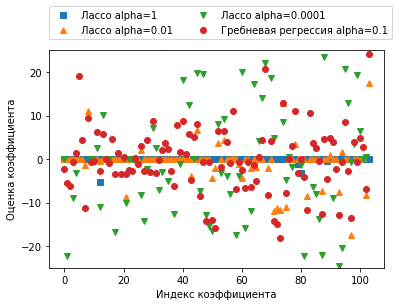

In [47]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

/Library/Python/3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Library/Python/3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


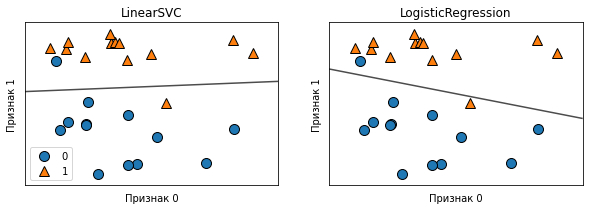

In [48]:
# Linear models for classification - линейные модели для классификации - применение Логической регрессии и метода опорных векторов
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

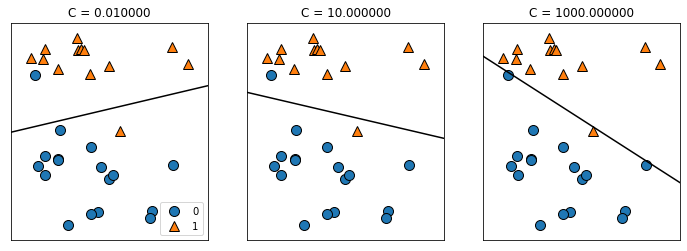

In [49]:
mglearn.plots.plot_linear_svc_regularization()

In [50]:
# C =1
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Обучающая: {:.3f}".format(logreg.score(X_train, y_train)))
print("Тестовая: {:.3f}".format(logreg.score(X_test, y_test)))

Обучающая: 0.953
Тестовая: 0.944


/Library/Python/3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# C = 100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Обучающая: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Тестовая: {:.3f}".format(logreg100.score(X_test, y_test)))

Обучающая: 0.946
Тестовая: 0.958


/Library/Python/3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# C = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Обучающая: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Tестовая {:.3f}".format(logreg001.score(X_test, y_test)))

Обучающая: 0.934
Tестовая 0.930


/Library/Python/3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


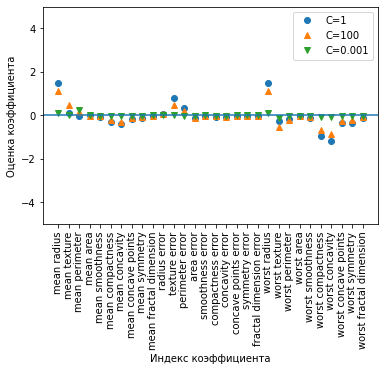

In [53]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

Правильность на обучении логич регресии l1 с C=0.001: 0.91
Правильность на тесте логич регресии l1 с C=0.001: 0.92
Правильность на обучении логич регресии l1 с C=1.000: 0.96
Правильность на тесте логич регресии l1 с C=1.000: 0.96
Правильность на обучении логич регресии l1 с C=100.000: 0.99
Правильность на тесте логич регресии l1 с C=100.000: 0.98


/Library/Python/3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


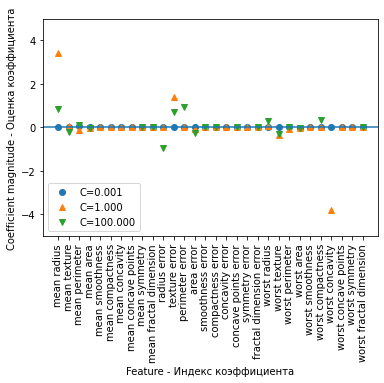

In [54]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Правильность на обучении логич регресии l1 с C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте логич регресии l1 с C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature - Индекс коэффициента")
plt.ylabel("Coefficient magnitude - Оценка коэффициента")

plt.ylim(-5, 5)
plt.legend(loc=3)

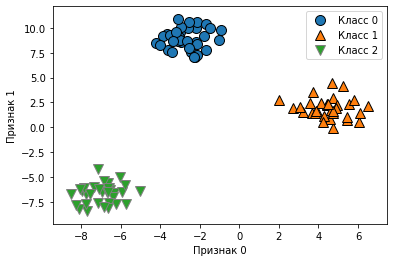

In [55]:
# Linear models for multiclass classification - линейный модели для мультиклассовой классификации
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

In [56]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape - Форма коэффициента: ", linear_svm.coef_.shape)
print("Intercept shape - Форма константы: ", linear_svm.intercept_.shape)

Coefficient shape - Форма коэффициента:  (3, 2)
Intercept shape - Форма константы:  (3,)


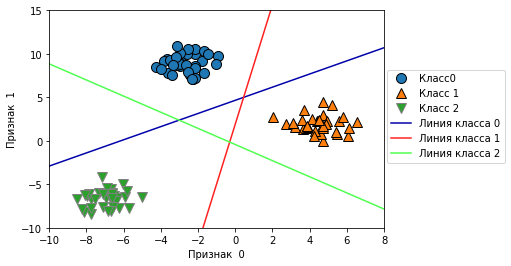

In [57]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак  0")
plt.ylabel("Признак  1")
plt.legend(['Класс0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
            'Линия класса 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Признак 1')

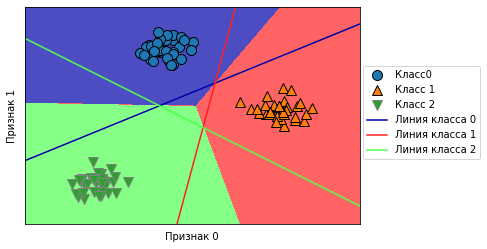

In [58]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
            'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [59]:
# Naive Bayes Classifiers - Наивный байесовкий классифкатор
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # итерация по каждому классу
    # Количество (сумма) записей 1 на элемент
    counts[label] = X[y == label].sum(axis=0)
print("Кол-во функций:\n", counts)

Кол-во функций:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [60]:
# анализ деревьев решений
# контроль сложности дерева - пример переобученной модели
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy обучающей: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy тестового: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy обучающей: 1.000
Accuracy тестового: 0.937


In [61]:
# пример хорошей модели
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy обучающей: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy тестового: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy обучающей: 0.988
Accuracy тестового: 0.951


In [62]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [63]:
print("Важность признаков:")
print(tree.feature_importances_)

Важность признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


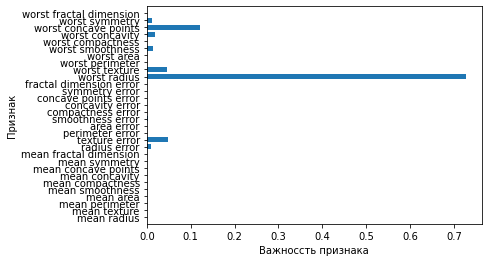

In [64]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важноссть признака")
    plt.ylabel("Признак")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

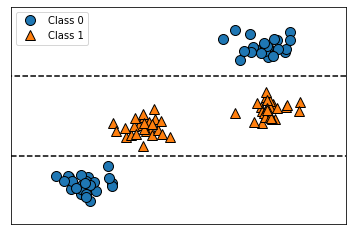

In [65]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Цена $/Mbyte')

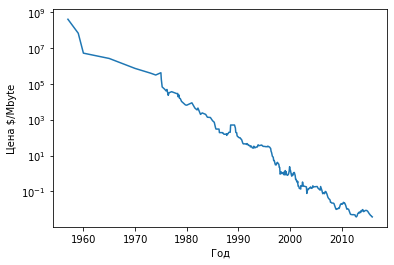

In [66]:
import os
# Дерево регрессии
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Mbyte")

In [67]:
from sklearn.tree import DecisionTreeRegressor
# исторические данные для прогнозирования цен после 2000 года
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# предсказание цены по данным
X_train = data_train.date[:, np.newaxis]
# перевод в логарифмический вид чтобы связать с целевой переменной
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# прогноз на всех данных
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# назад из логарифмического вида
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/var/folders/xc/0v6s_22d4x31_zddmb9cj68m0000gn/T/ipykernel_665/2604738635.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
/var/folders/xc/0v6s_22d4x31_zddmb9cj68m0000gn/T/ipykernel_665/2604738635.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


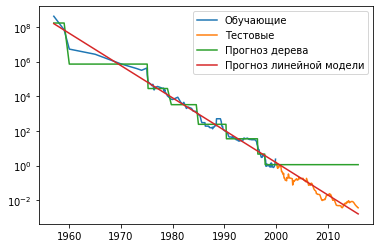

In [68]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие")
plt.semilogy(data_test.date, data_test.price, label="Тестовые")
plt.semilogy(ram_prices.date, price_tree, label="Прогноз дерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогноз линейной модели")
plt.legend()

In [69]:
# ансамбли деревьев решений
# рандомный лес на 5 деревьев
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

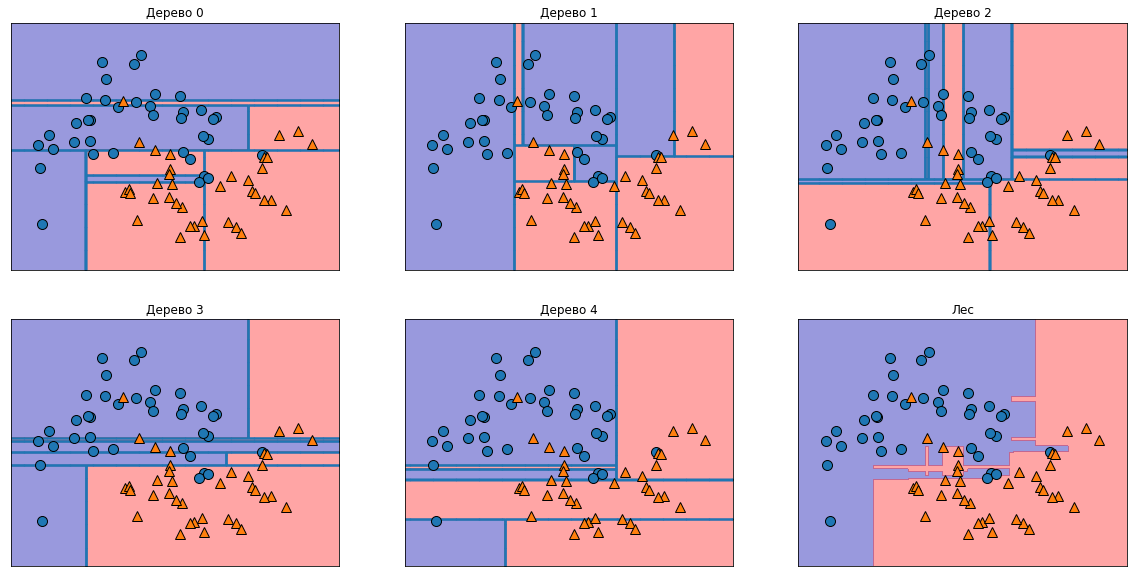

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Дерево {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Лес")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
# переобучение
print("Обучающая accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Тестовая Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Обучающая accuracy: 1.000
Тестовая Accuracy: 0.972


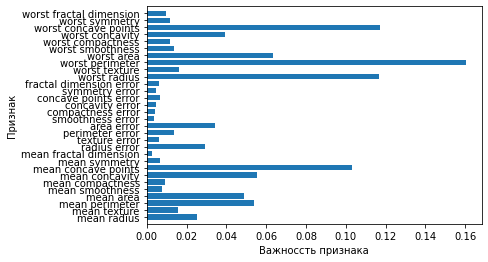

In [72]:
plot_feature_importances_cancer(forest)

In [73]:
# градиентный бустинг дерева регрессии
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy обучающего: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy тестового: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy обучающего: 1.000
Accuracy тестового: 0.965


In [74]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy обучающего: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy тестового: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy обучающего: 0.991
Accuracy тестового: 0.972


In [75]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy обучающего: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy oтестового: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy обучающего: 0.988
Accuracy oтестового: 0.965


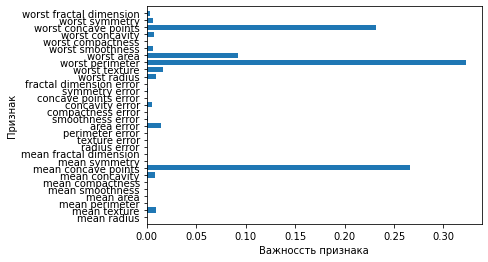

In [76]:
# вес признаков
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

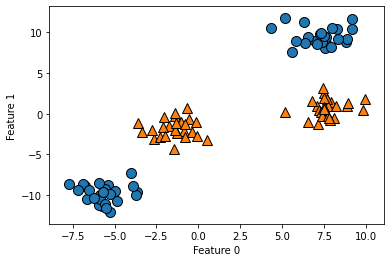

In [77]:
# Kernelized Support Vector Machines метод ядерных векторов
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/var/folders/xc/0v6s_22d4x31_zddmb9cj68m0000gn/T/ipykernel_665/711688515.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

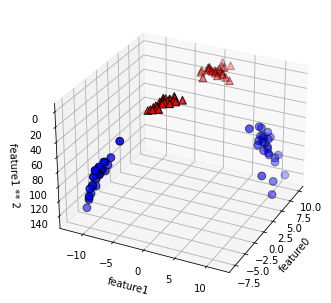

In [78]:
# возведение в квадрат превого признака
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# визуализация
ax = Axes3D(figure, elev=-152, azim=-26)
# Сначала все точки с y==0, затем все с y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/Library/Python/3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/xc/0v6s_22d4x31_zddmb9cj68m0000gn/T/ipykernel_665/1770006538.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

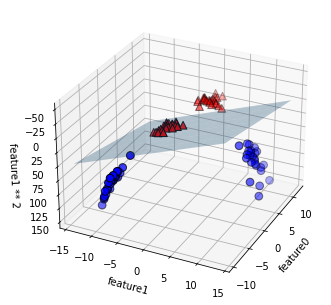

In [79]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# линейная граница принятия решения
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

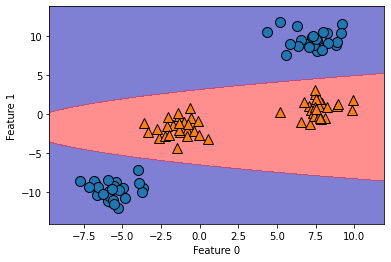

In [80]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

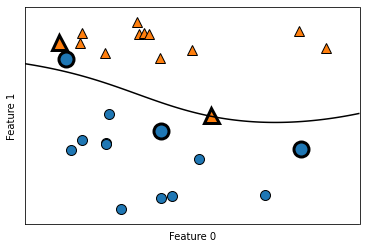

In [81]:
# ядерный трюк
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

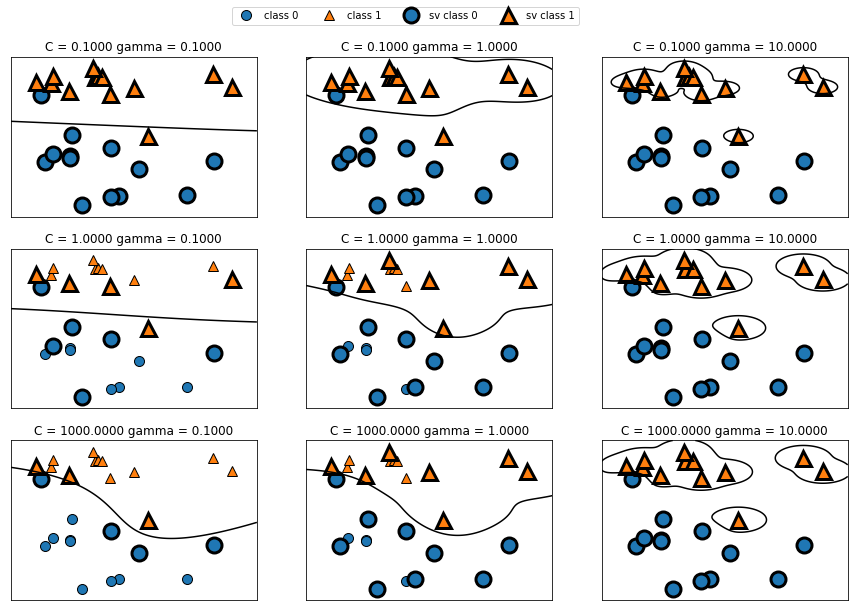

In [82]:
# параетры svc
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [83]:
# Предварительная обработка данных для SVM
# Вычислите минимальное значение для каждого элемента в тренировочном наборе
min_on_training = X_train.min(axis=0)
# Вычислите диапазон каждой функции (максимум - мин) на тренировочном наборе
range_on_training = (X_train - min_on_training).max(axis=0)

# Вычитаем мин, делим на диапазон
# после этого, min=0 и max=1 для каждой функции
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [84]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972
Accuracy on training set: 1.000
Accuracy on test set: 0.958


Text(0, 0.5, 'Feature 1')

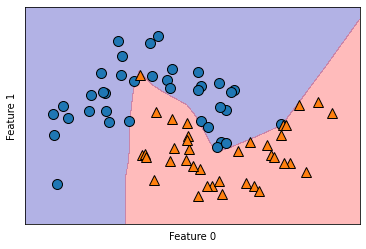

In [85]:
# нейронные сети
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

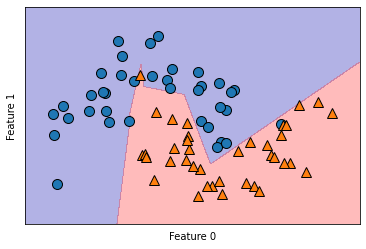

In [86]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

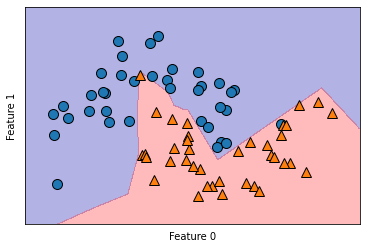

In [87]:
# два скрытых слоя, по 10 единиц каждый
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

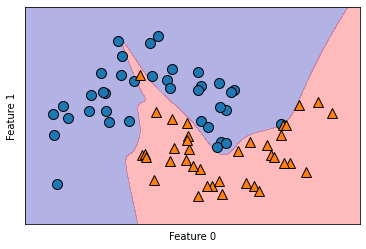

In [88]:
# два скрытых слоя по 10 единиц каждый, теперь с нелинейностью Тангенса
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


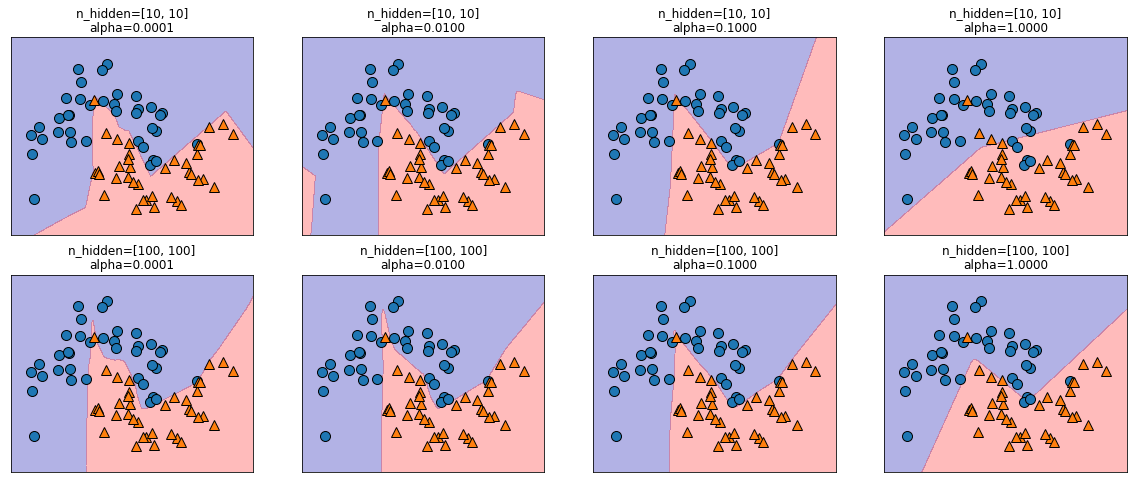

In [89]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

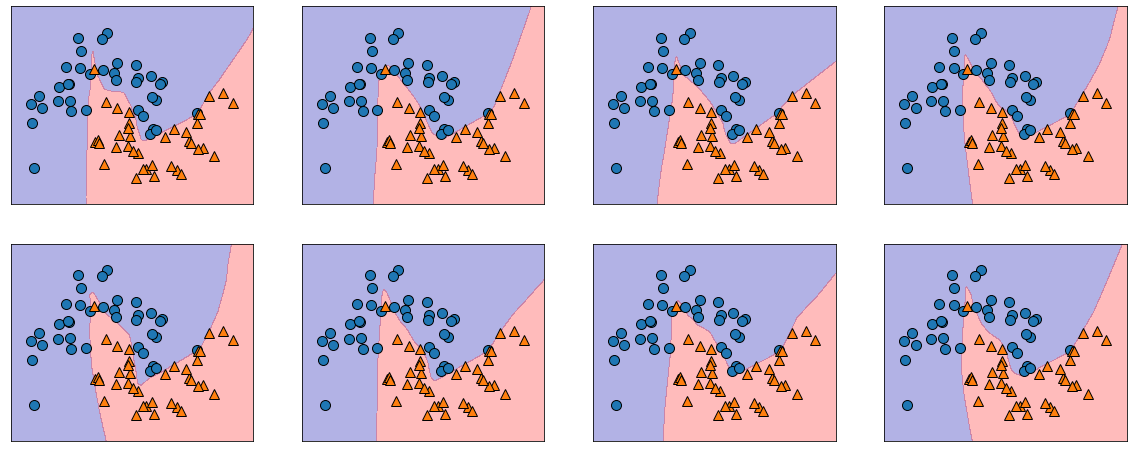

In [90]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [91]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [92]:
# среднее значение для каждой функции в тренировочном наборе
mean_on_train = X_train.mean(axis=0)
# Стандартное отклонение каждой функции в тренировочном наборе
std_on_train = X_train.std(axis=0)

# Вычесть среднее значение и масштабировать обратное стандартное отклонение
# После этого, mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# Используйте ОДНО И ТО ЖЕ преобразование (с использованием тренировочного среднего и std) в тестовом наборе
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Library/Python/3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [93]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [94]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


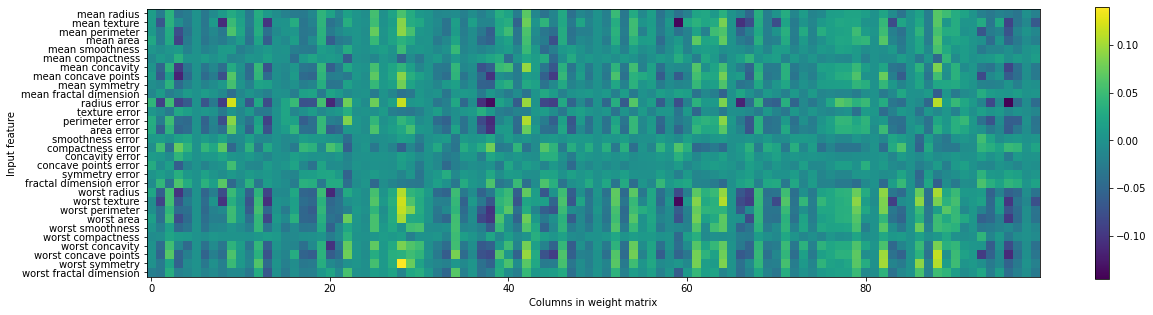

In [95]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [96]:
# Функция принятия решения
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (143, 30)
Decision function shape: (143,)


In [97]:
# первые несколько записей decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Decision function: [-2.15329478  3.19492934  5.18519519  2.52478483  4.76896285  4.36125736]
Thresholded decision function:
 [False  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True False False False False False  True  True
 False  True  True False  True False  True False  True False  True False
  True False  True False False  True False  True  True False  True  True
  True False False False False  True  True  True  True  True  True False
 False False  True  True False  True False False False  True  True False
  True  True False  True  True  True  True  True False False False  True
 False  True  True  True False False  True  True False False  True  True
 False  True  True  True  True  True  True  True False  True False  True
 False False  True False False  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True False  True
  True  True  True  True  True False False  True  True  True False]
Pred

In [98]:
# логический True/False в 0 и 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# 0 и 1 в качестве индексов в классах
pred = gbrt.classes_[greater_zero]
# Pred такой же, как и вывод gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

pred is equal to predictions: True
Decision function minimum: -5.94 maximum: 5.44


In [110]:
# Прогнозирование вероятностей
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Shape of probabilities: (143, 2)
Predicted probabilities:
[[0.89597626 0.10402374]
 [0.03935699 0.96064301]
 [0.00556767 0.99443233]
 [0.07413883 0.92586117]
 [0.00841772 0.99158228]
 [0.01260151 0.98739849]]
